<strong>Importing Libraries</strong>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<strong>Loading the data</strong>

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

<strong>Visualising the loaded data</strong>

In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

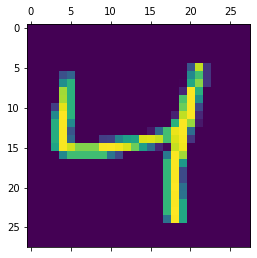

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train.shape

(60000, 28, 28)

<strong>Normalising the pixel values of train and test images</strong>
<br>
Since pixel values are between 0 and 255, values for each pixel is devided by 255. 

In [9]:
X_train = X_train/255
X_test = X_test/255

<strong>Manually Flattening the array of pixel values</strong>
<br>
`keras.layers.Flatten` can also be used to perform this operation


In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_test_flattened.shape

(10000, 784)

In [12]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<strong>Coding the Neural Network</strong>

In [13]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4685 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2657 - accuracy: 0.9272


[0.26568150520324707, 0.9272000193595886]

<strong>Maing some predictions</strong>

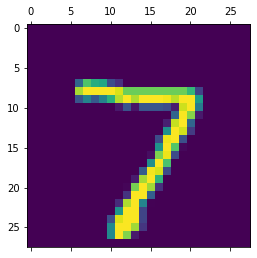

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted = model.predict(X_test_flattened)

In [17]:
y_predicted[0]

array([4.11011577e-02, 4.24657145e-07, 7.02411532e-02, 9.63998437e-01,
       2.25362182e-03, 1.22214139e-01, 1.31347872e-06, 9.99786079e-01,
       1.06294274e-01, 7.05348194e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

AxesImage(43.2,25.92;223.2x223.2)


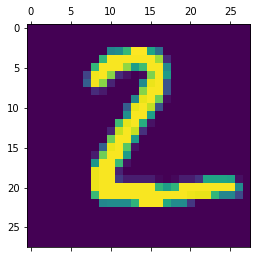

In [19]:
i = 1
print(plt.matshow(X_test[i]))


In [20]:
print(np.argmax(y_predicted[i]))

2


In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [23]:
list(y_test[:20])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [24]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    9,  926,   17,    6,    4,   12,    9,   41,    4],
       [   2,    0,   20,  928,    0,   20,    2,   10,   21,    7],
       [   1,    2,    6,    1,  912,    0,   10,    4,    9,   37],
       [   8,    2,    2,   38,    7,  775,   15,    4,   35,    6],
       [  11,    3,    7,    1,    7,   12,  912,    2,    3,    0],
       [   1,    7,   23,    7,    6,    1,    0,  942,    4,   37],
       [   5,    6,    5,   21,    9,   22,    8,    8,  884,    6],
       [  10,    7,    1,   13,   23,    6,    0,   19,    8,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

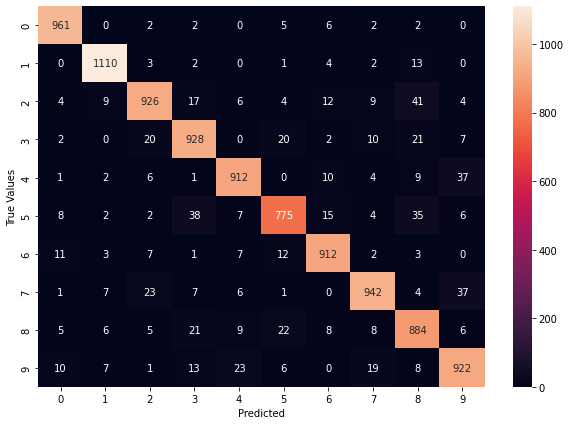

In [25]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [26]:
model = keras.Sequential([
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9833


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9770


[0.07666292786598206, 0.9769999980926514]

In [28]:
y_predicted = model.predict(X_test_flattened)

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    2,    2,    2,    1,    1,    1,    1],
       [   0, 1121,    3,    0,    0,    1,    5,    1,    4,    0],
       [   7,    0, 1002,    3,    5,    0,    2,    9,    4,    0],
       [   1,    0,    3,  986,    0,    3,    0,    7,    4,    6],
       [   4,    0,    2,    0,  964,    0,    2,    1,    0,    9],
       [   2,    0,    0,   10,    2,  866,    6,    0,    2,    4],
       [   4,    3,    1,    1,    7,    5,  935,    1,    1,    0],
       [   0,    3,    8,    0,    3,    0,    0, 1006,    1,    7],
       [   2,    0,    3,    5,    5,    4,    4,    5,  942,    4],
       [   2,    3,    0,    4,   10,    2,    1,    9,    0,  978]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

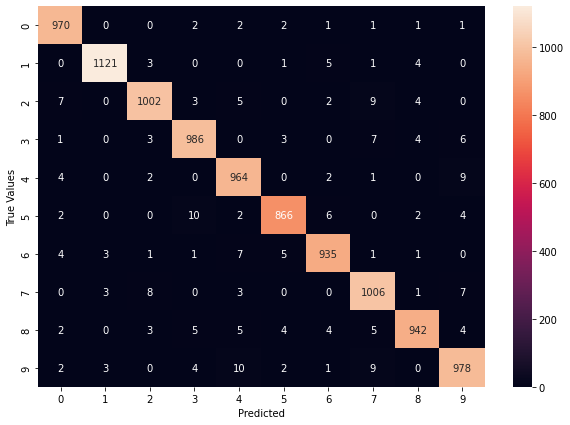

In [31]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [32]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)), #Flattening using Keras
                  keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9841


In [33]:
y_predicted = model.predict(X_test)

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    3,    1,    0,    0,    2,    1,    4,    1],
       [   0, 1120,    5,    0,    0,    0,    4,    0,    6,    0],
       [   4,    0, 1018,    0,    2,    0,    2,    3,    3,    0],
       [   0,    0,   19,  947,    0,    9,    0,    7,   20,    8],
       [   1,    0,    3,    0,  961,    0,    6,    2,    2,    7],
       [   4,    0,    1,    7,    2,  864,    7,    0,    6,    1],
       [   5,    3,    3,    1,    4,    3,  936,    0,    3,    0],
       [   1,    5,   14,    0,    0,    0,    0, 1001,    1,    6],
       [   4,    0,    5,    1,    4,    1,    2,    2,  952,    3],
       [   1,    5,    0,    3,    6,    1,    2,    9,    5,  977]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

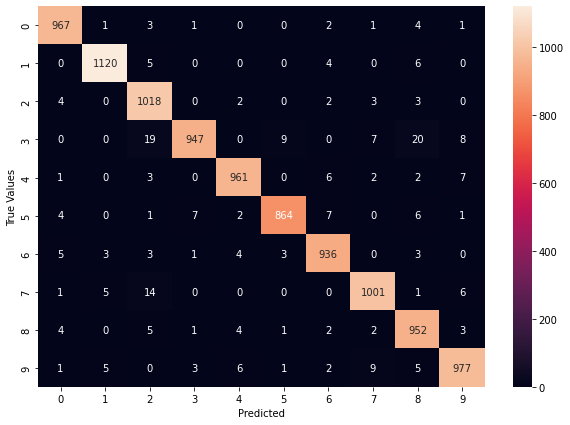

In [36]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Values')